In [2]:
import numpy as np
import pandas as pd
from scipy import stats as sts
from scipy import optimize as opt
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [174]:
N = 1000
M = 100
# Набор значений параметра, который будем оценивать
TH = [10, 50, 100]

In [175]:
# Функция, которая возвращает массивы потерь для всех оценок
def est_mean(th, M, N):
    # Генерируем М выборок размера N
    un = sts.uniform(loc=0, scale=th)
    UNs = [un.rvs(N) for i in range(M)]
    # Считаем квадратичные потери каждой из оценок на каждом из начальных отрезков
    ans1 =  list(map( lambda n: np.mean(list(map(lambda i: (2 * np.mean(UNs[i][:n]) - th)**2, range(M) ))), range(1, N) ))
    ans2 =  list(map( lambda n: np.mean(list(map(lambda i: ((n + 1)*np.min(UNs[i][:n]) - th)**2, range(M) ))), range(1, N) ))
    ans3 =  list(map( lambda n: np.mean(list(map(lambda i: (np.amin(UNs[i][:n]) + np.amax(UNs[i][:n]) - th)**2, range(M) ))), range(1, N) ))
    ans4 =  list(map( lambda n: np.mean(list(map(lambda i: ((n + 1) / n * np.amax(UNs[i][:n]) - th)**2, range(M) ))), range(1, N) ))
    return [ans1, ans2, ans3, ans4]

theta = 10


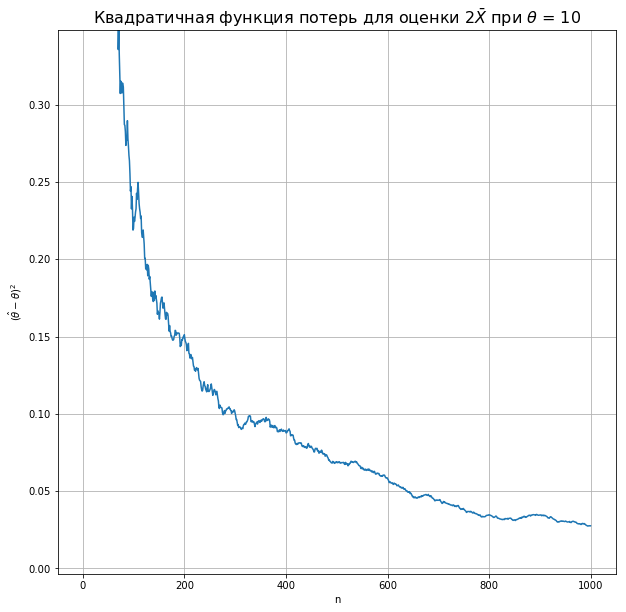

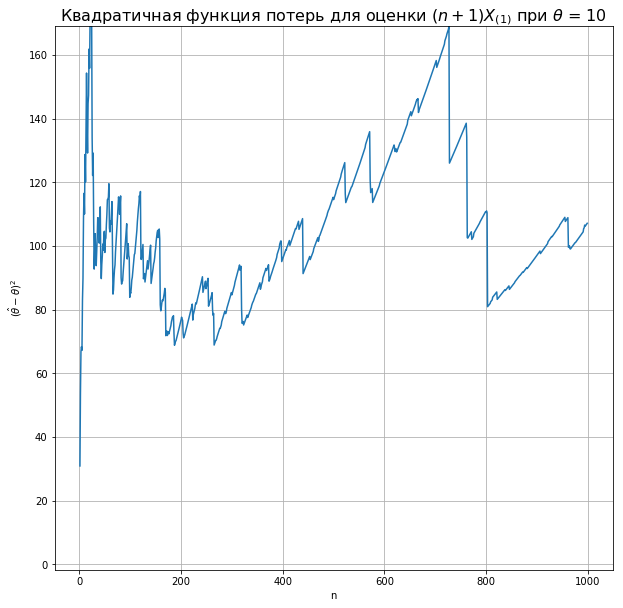

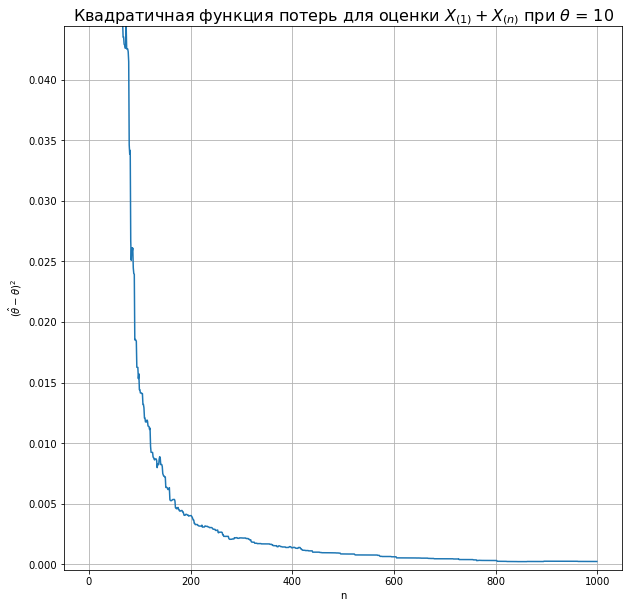

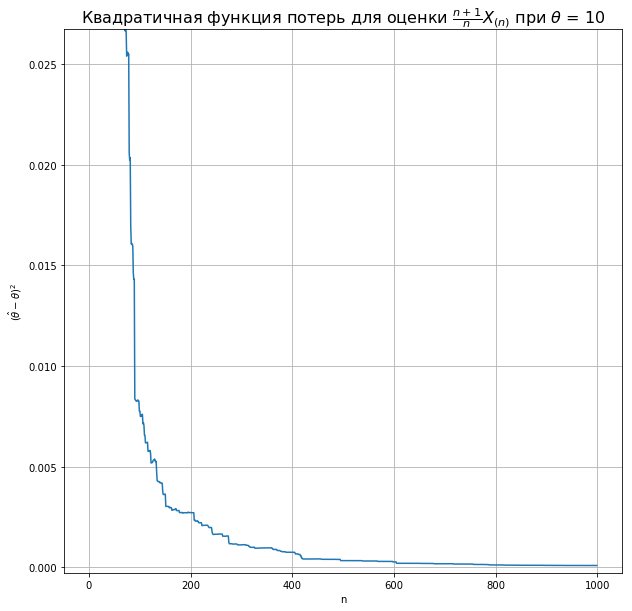

theta = 50


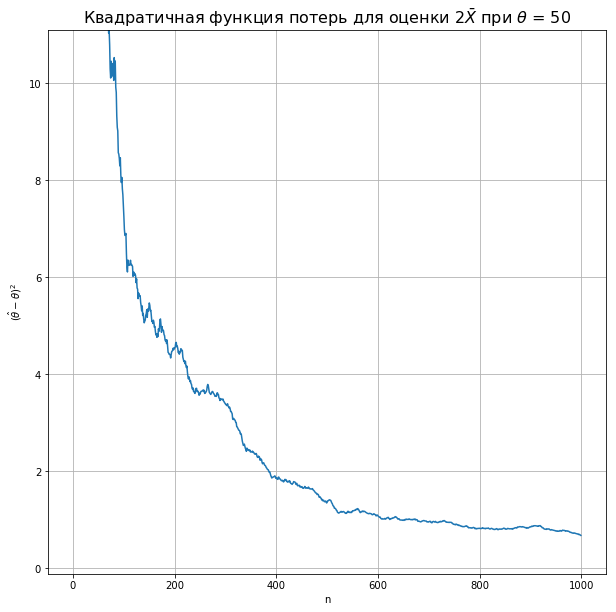

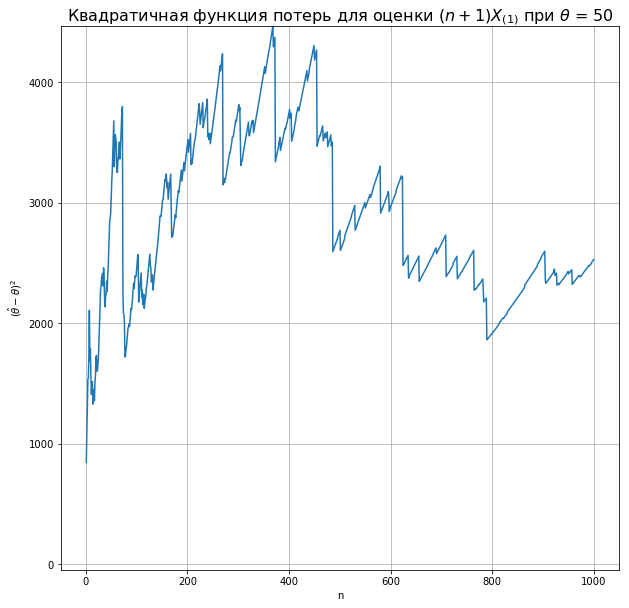

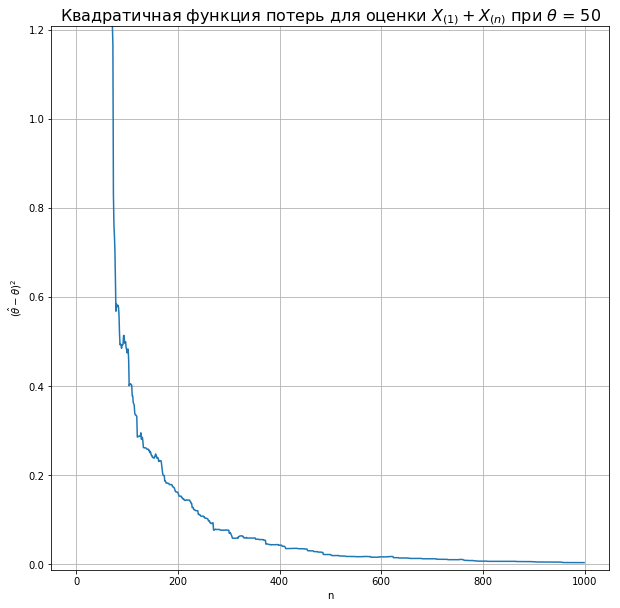

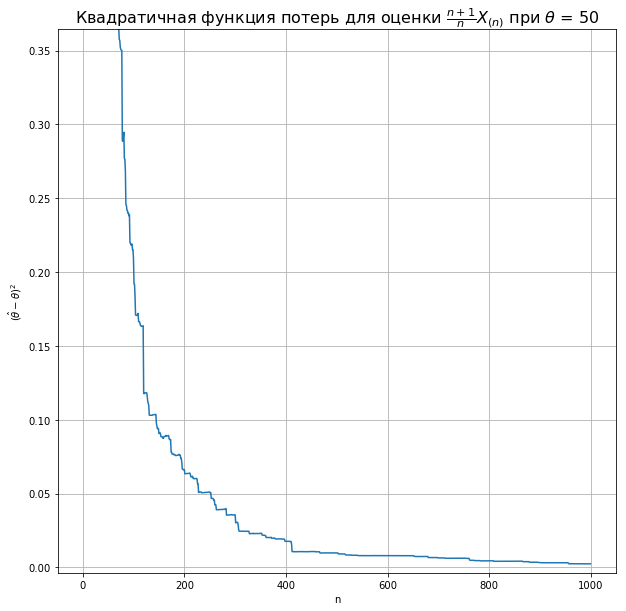

theta = 100


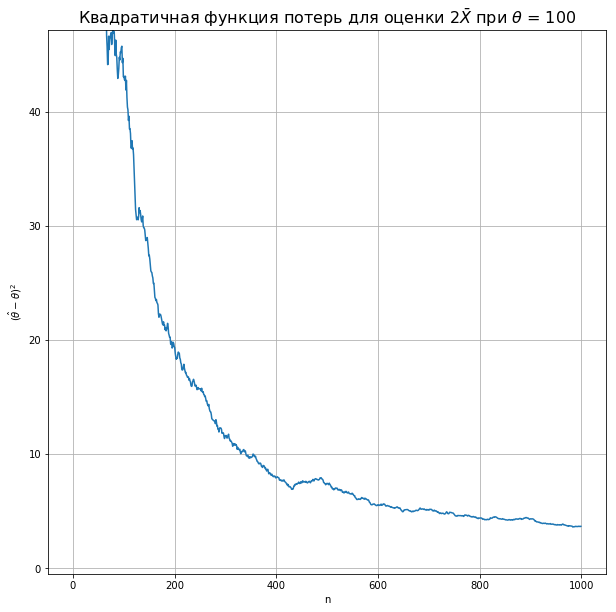

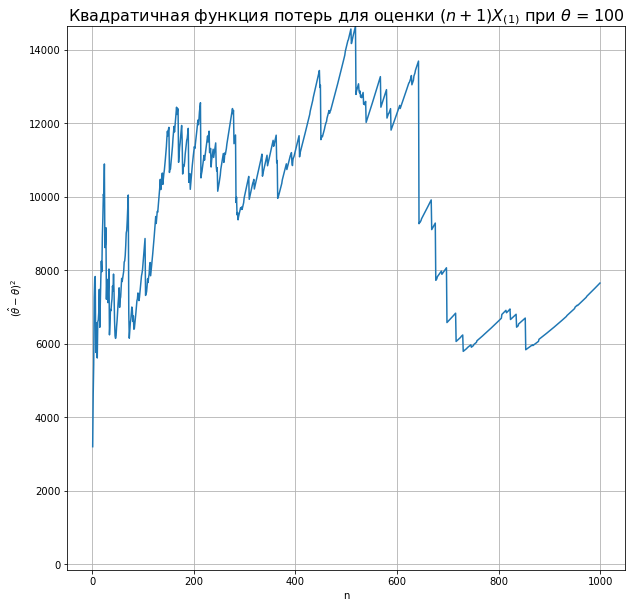

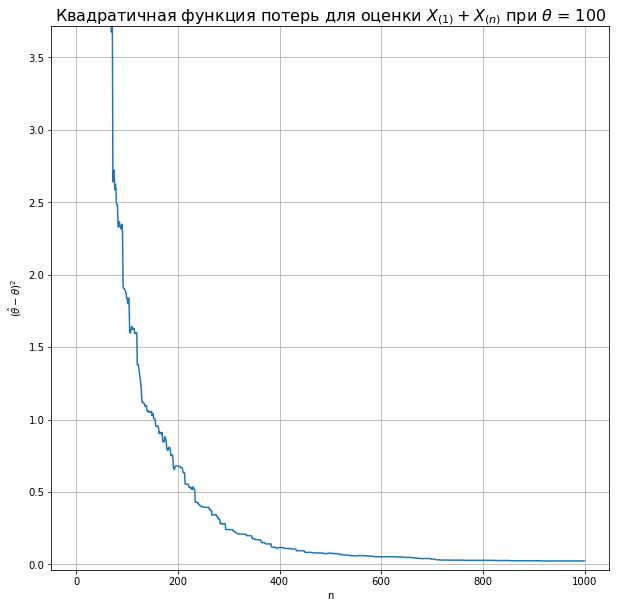

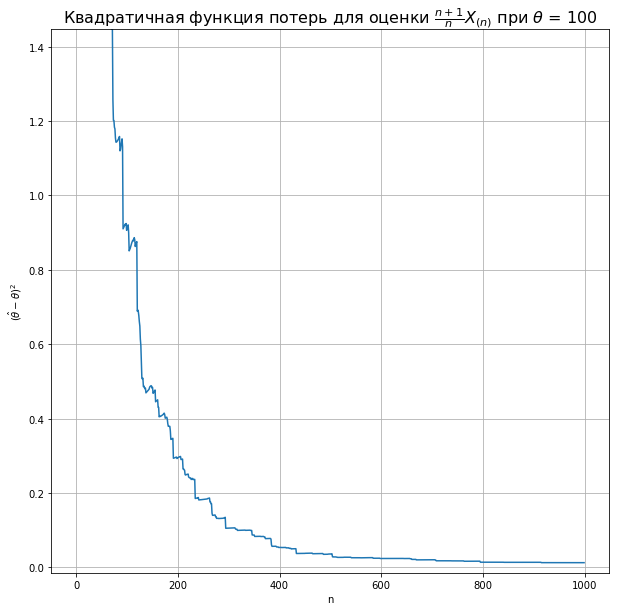

CPU times: user 17.3 s, sys: 68 ms, total: 17.4 s
Wall time: 17.3 s


In [193]:
%%time
for th in TH:
    print('theta =', th)
    # Для текущего значения тетта считаем функции потерь для всех оценок
    Ans = est_mean(th, M, N)
    X_f = range(1, N)
    # Названия оценок, в том порядке, в котором они идут в массиве Ans
    Ests = ['$2 \\bar{X}$', '$(n + 1)X_{(1)}$', '$X_{(1)} + X_{(n)}$', '$\\frac{n+1}{n} X_{(n)}$']
    for ans, est in zip(Ans, Ests):
        # Каждую из оценок строим на отдельном графике
        plt.figure(figsize=(10,10))
        plt.subplot()
        title = 'Квадратичная функция потерь для оценки %s при $\\theta$ = %d' %(est, th)
        plt.title(title, fontsize=16)
        plt.ylim((-0.01 * np.amax(ans[70:]), np.amax(ans[70:]) ))
        plt.plot(X_f, ans)
        plt.xlabel('n')
        plt.ylabel('$( \\hat \\theta - \\theta ) ^ 2 $')
        plt.grid()
        plt.show()

Как видим, оценки $2 \bar{X}$, $X_{(1)} + X_{(n)}$ и $\frac{n+1}{n} X_{(n)}$ хорошо сходятся в смысле кадратической функции потерь. 

Оценка $(n + 1)X_{(1)}$ расходится.

Так же видим, что с увеличением параметра, оценки сходятся медленнее.